<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/Lab11_Deeplearning02_LHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x_data=np.array([1,2,3,4,5],np.float32)
y_data=np.array([1,2,3,4,5],np.float32)

# Linear regression

In [ ]:
learning_rate=1e-2

In [ ]:
w=tf.Variable([0],dtype='float32')

In [ ]:
b=tf.Variable([0],dtype='float32')

In [ ]:
for i in range(100):
  # loss
  with tf.GradientTape() as tape:
    hypothesis=x_data*w+b
    loss=tf.reduce_mean(tf.square(hypothesis-y_data))

  # gradient
  w_grad,b_grad=tape.gradient(loss,[w,b])

  # updata
  w.assign_sub(learning_rate*w_grad)
  b.assign_sub(learning_rate*b_grad)

  # display
  if i % 10==0:
    print('iteration {} loss {}'.format(i,loss))

iteration 0 loss 2.1863298416137695
iteration 10 loss 0.02085178717970848
iteration 20 loss 0.010351987555623055
iteration 30 loss 0.009632790461182594
iteration 40 loss 0.009001738391816616
iteration 50 loss 0.00841218326240778
iteration 60 loss 0.007861273363232613
iteration 70 loss 0.0073464298620820045
iteration 80 loss 0.006865309085696936
iteration 90 loss 0.006415707524865866


In [ ]:
w.numpy()

array([0.9497297], dtype=float32)

In [ ]:
b.numpy()

array([0.18149184], dtype=float32)

In [ ]:
w

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.9497297], dtype=float32)>

In [ ]:
x_data*w+b

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.1312215, 2.0809512, 3.030681 , 3.9804106, 4.9301405],
      dtype=float32)>

In [ ]:
y_data

array([1., 2., 3., 4., 5.], dtype=float32)

# subclassing

In [ ]:
# model
class Model(tf.keras.layers.Layer):
  def __init__(self):
    super(Model,self).__init__()

    self.w=self.add_weight(shape=(1,1))
    self.b=self.add_weight(shape=(1,))

  def call(self,inputs):
    return inputs*self.w+self.b

In [ ]:
# loss
loss=tf.keras.losses.MeanSquaredError()

In [ ]:
# gradient
def grad(model,inputs,targets):
  with tf.GradientTape() as tape:
    loss_value=loss(targets,model(inputs))
  return tape.gradient(loss_value,[model.w, model.b])

In [ ]:
# define
model=Model()
optimizer=tf.keras.optimizers.SGD(learning_rate)

In [ ]:
# learning
for i in range(100):
  # gradient
  grads=grad(model,x_data,y_data)

  # updata
  optimizer.apply_gradients(zip(grads,[model.w,model.b]))

  # display

if 1%10==0:
  print('{}{}'.format(i.loss(y_data,model(x_data))))

In [ ]:
model.w.numpy()

array([[0.8966675]], dtype=float32)

In [ ]:
model.b.numpy()

array([0.37306312], dtype=float32)

In [ ]:
model(x_data)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[1.2697306, 2.166398 , 3.0630655, 3.959733 , 4.8564005]],
      dtype=float32)>

In [ ]:
y_data

array([1., 2., 3., 4., 5.], dtype=float32)

# Sequential model

In [ ]:
# model
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


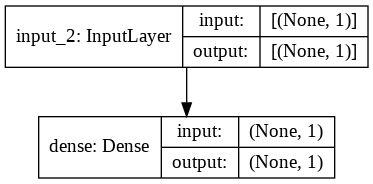

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),loss=tf.keras.losses.MeanSquaredError())

In [ ]:
# learning
model.fit(x_data,y_data,epochs=100,verbose=0)

In [ ]:
model.evaluate(x_data,y_data,verbose=1)

1/1 [==============================] - 0s 18ms/step - loss: 2.5795e-06


2.579513875389239e-06

In [ ]:
model.get_weights()

[array([[1.0010427]], dtype=float32), array([-0.00376452], dtype=float32)]

In [ ]:
y_data

array([1., 2., 3., 4., 5.], dtype=float32)

In [ ]:
model.predict(x_data)

array([[0.9972782],
       [1.9983209],
       [2.9993634],
       [4.0004063],
       [5.001449 ]], dtype=float32)